## Assignment 3 : Assignment on Classification technique

 1. Name    : Om Mapari
 2. class   : TE 10 (M-10)
 3. Roll No.: 33245

Every year many students give the GRE exam to get admission in foreign Universities. The data
set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),
Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
Admitted is the target variable.

Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)Data
Set : https://www.kaggle.com/mohansacharya/graduate-


The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.

1. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques ifnecessary.
2. Perform data-preparation (Train-Test Split)
3. Apply Machine Learning Algorithm
4. Evaluate Model.


In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading of Dataset

In [2]:
data = pd.read_csv("Admission_Predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
data.shape

(400, 9)

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# droping Id column

data.drop("Serial No.",axis=1,inplace=True)

In [8]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
#Applying necessary function on "Chance of Admit"

data["Chance of Admit "]=data["Chance of Admit "].apply(lambda x: 1 if x>0.5 else 0)

In [10]:
# Checking Dataset

data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,1


## 2. Familiarizing with data

In [11]:
#Find missing values
print("Missing values:\n")
data.isnull().sum()

Missing values:



GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From this we can come to know that there is no missing value in dataset.

In [12]:
# info about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


In [13]:
#Correlation among dataset

data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.390875
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.393121
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.279316
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.285939
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.353341
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.455949
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.216193
Chance of Admit,0.390875,0.393121,0.279316,0.285939,0.353341,0.455949,0.216193,1.000000


## 3.Visualizing the data

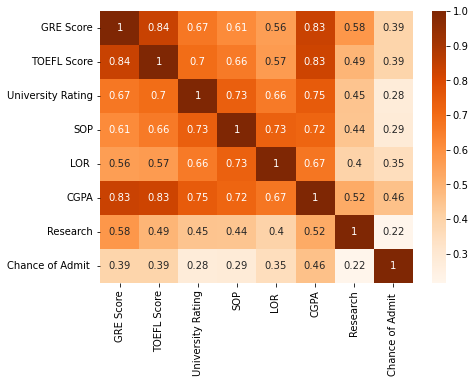

In [14]:
#Correlation heatmap

plt.figure(figsize=(7,5)) # size 
sns.heatmap(data.corr(), annot=True, cmap='Oranges') # draw heap map
plt.show()

There is very low correlation among "Change of Admit" and other feature. 

In [15]:
# Calculating total Count

data_admit = data[data['Chance of Admit ']==1]
data_non_admit = data[data['Chance of Admit ']==0]
print("Admitted count       : " ,data_admit.shape[0])
print("Non - Admitted count : " ,data_non_admit.shape[0])

Admitted count       :  365
Non - Admitted count :  35


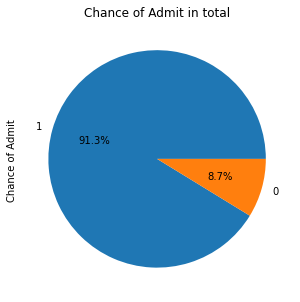

In [16]:
# pie chart for "Chance of Admit"

data['Chance of Admit '].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Chance of Admit in total")
plt.show()


In [19]:
#highest GRE score
print("maximum GRE Score : ",data['GRE Score'].max())
#lowest GRE score
print("minimum GRE Score : ",data['GRE Score'].min())

maximum GRE Score :  340
minimum GRE Score :  290


## 4. Splitting of Dataset

In [24]:
# dependent and independent feature

X= data.drop("Chance of Admit ",axis =1 )
y= data["Chance of Admit "] # depen

In [25]:
# unique in independent feature

X.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
dtype: int64

In [26]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

# Shape of train Test Split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(320, 7) (320,)
(80, 7) (80,)


## 5. Model Training and Testing

In [27]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier


# instantiate the model 
tree = DecisionTreeClassifier()

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)


print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.838


In [30]:
from sklearn.metrics import classification_report
#computing the classification report of the model

print(classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.91      0.90      0.91        70

    accuracy                           0.84        80
   macro avg       0.64      0.65      0.64        80
weighted avg       0.84      0.84      0.84        80



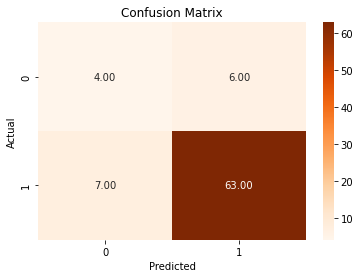

In [35]:
#visualization of Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_tree)

sns.heatmap(cm, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

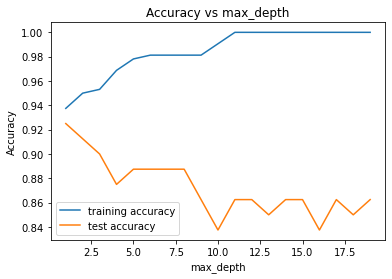

In [36]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 50
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.title("Accuracy vs max_depth")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## 6. Conclusion:
1. We have successfully Classify the Admitted or not based on the given feature using Decision Tree model.
2. Accuracy comes tobe 85% on testing dataset.
3. As we increases the Max_depth accuracy fluctuate between 84% to 86%.
4. Chance of Admit is greater than chance of non-admit.